In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
pd.set_option('display.max_columns', None)

In [7]:
file_path_tmall = "/Users/tcbozay/Downloads/TMall.parquet"
df_tmall = pd.read_parquet(file_path_tmall)
df_tmall.head(5)

,SSID,user_session,session,visitorid,timestamp,itemid,event,event_duration,events_per_session,PageTime,PathLength,TotalViewingTime,TotalATCTime,TotalPurchaseTime,AmountOfItemsViewed,AmountOfItemsPurchased,AmountOfItemsATC,Frequency_A0,Frequency_A1,Frequency_A2,AvgTimeOfViewing,AvgTimeOfATC,AvgTimeOfPurchasing,time_since_last_view,time_since_last_ATC,time_since_last_purchase,time_since_last_event,TimeOfDay,WeekdayVsWeekend,Month,Season,ATC,Purchase
1092725,201308271734260100000055339,1000000_0,0,1000000,2013-08-27 17:34:00.626,55339,2,260.718177,1,260.718177,1,260.718177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.0,0.0,0.0,0.0,0.0,0.0,1,0,8,2,0,0
1942407,2013052416242601000001320115,1000001_0,0,1000001,2013-05-24 16:24:31.738,320115,2,260.718177,1,260.718177,1,260.718177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5,1,0,0
1073483,2013082622502601000002376356,1000002_0,0,1000002,2013-08-26 22:50:57.216,376356,2,260.718177,1,260.718177,1,260.718177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.0,0.0,0.0,0.0,0.0,0.0,2,0,8,2,0,0
837287,2013081308262601000003422529,1000003_0,0,1000003,2013-08-13 08:26:28.112,422529,2,260.718177,1,260.718177,1,260.718177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,8,2,0,0
324990,2013061702082601000007300114,1000007_0,0,1000007,2013-06-17 02:08:42.130,300114,2,260.718177,1,260.718177,1,260.718177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.0,0.0,0.0,0.0,0.0,0.0,3,0,6,2,0,0


In [9]:
file_path_tmall_log_data = "/Users/tcbozay/Downloads/TMall_LogData.parquet"
df_tmall_logdata = pd.read_parquet(file_path_tmall_log_data)
df_tmall_logdata.head(5)

,user_id,Vtime,Action,item_id
2221254,1002100,2013-07-09 02:56:23.059,cart,271494
925079,102050,2013-08-18 18:27:15.860,click,252397
922107,102050,2013-08-18 18:27:53.330,collect,349736
478042,1002349,2013-06-24 20:03:13.645,collect,170390
483353,1002349,2013-06-24 20:22:53.406,click,409804


In [11]:
# Used 'pd.merge' because user_id and visitorid columns completely match.
df_merged = pd.merge(df_tmall_logdata, df_tmall, left_on="user_id", right_on="visitorid", how="inner")
print("\nMerged Data Frame:")
df_merged.head(5)


Merged Data Frame:


,user_id,Vtime,Action,item_id,SSID,user_session,session,visitorid,timestamp,itemid,event,event_duration,events_per_session,PageTime,PathLength,TotalViewingTime,TotalATCTime,TotalPurchaseTime,AmountOfItemsViewed,AmountOfItemsPurchased,AmountOfItemsATC,Frequency_A0,Frequency_A1,Frequency_A2,AvgTimeOfViewing,AvgTimeOfATC,AvgTimeOfPurchasing,time_since_last_view,time_since_last_ATC,time_since_last_purchase,time_since_last_event,TimeOfDay,WeekdayVsWeekend,Month,Season,ATC,Purchase
0,1002100,2013-07-09 02:56:23.059,cart,271494,2013070902162601002100271494,1002100_0,0,1002100,2013-07-09 02:16:05.084,271494,2,260.718177,1,260.718177,1,260.718177,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.000000,0.0,0.0,0.0,0.0,0.00,3,0,7,2,0,0
1,1002100,2013-07-09 02:56:23.059,cart,271494,2013070902561771002100271494,1002100_1,1,1002100,2013-07-09 02:56:23.059,271494,0,177.233817,1,177.233817,1,0.000000,177.233817,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,177.233817,0.0,0.0,0.0,0.0,0.00,3,0,7,2,1,0
2,1002100,2013-07-09 02:56:23.059,cart,271494,2013070913542601002100271494,1002100_2,2,1002100,2013-07-09 13:54:29.782,271494,2,260.718177,1,260.718177,1,260.718177,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260.718177,0.000000,0.0,0.0,0.0,0.0,0.00,1,0,7,2,0,0
3,102050,2013-08-18 18:27:15.860,click,252397,201308181827214102050252397,102050_0,0,102050,2013-08-18 18:27:15.860,252397,2,37.470000,2,37.470000,1,37.470000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,37.470000,0.000000,0.0,0.0,0.0,0.0,0.00,2,1,8,2,0,0
4,102050,2013-08-18 18:27:15.860,click,252397,201308181827214102050349736,102050_0,0,102050,2013-08-18 18:27:53.330,349736,0,177.233817,2,214.703817,2,0.000000,177.233817,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,177.233817,0.0,0.0,0.0,0.0,37.47,2,1,8,2,1,0


In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32924965 entries, 0 to 32924964
Data columns (total 37 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   user_id                   int64         
 1   Vtime                     datetime64[ns]
 2   Action                    object        
 3   item_id                   int64         
 4   SSID                      object        
 5   user_session              object        
 6   session                   int64         
 7   visitorid                 int64         
 8   timestamp                 datetime64[ns]
 9   itemid                    int64         
 10  event                     int64         
 11  event_duration            float64       
 12  events_per_session        int64         
 13  PageTime                  float64       
 14  PathLength                int64         
 15  TotalViewingTime          float64       
 16  TotalATCTime              float64       
 17  TotalP

In [15]:
df_merged.describe()

,user_id,Vtime,item_id,session,visitorid,timestamp,itemid,event,event_duration,events_per_session,PageTime,PathLength,TotalViewingTime,TotalATCTime,TotalPurchaseTime,AmountOfItemsViewed,AmountOfItemsPurchased,AmountOfItemsATC,Frequency_A0,Frequency_A1,Frequency_A2,AvgTimeOfViewing,AvgTimeOfATC,AvgTimeOfPurchasing,time_since_last_view,time_since_last_ATC,time_since_last_purchase,time_since_last_event,TimeOfDay,WeekdayVsWeekend,Month,Season,ATC,Purchase
count,3.292496e+07,32924965,3.292496e+07,3.292496e+07,3.292496e+07,32924965,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07,3.292496e+07
mean,7.049413e+05,2013-07-15 09:10:05.772522496,2.355957e+05,8.327569e+01,7.049413e+05,2013-07-15 09:10:05.772526592,2.355957e+05,1.965376e+00,3.649894e+02,1.936895e+01,3.124794e+03,1.018448e+01,3.018893e+03,7.161506e+00,1.248631e+00,9.819540e+00,3.429525e-03,5.649227e-02,1.843918e-01,1.649365e-02,9.983591e+00,3.760446e+02,3.745421e+00,1.159867e+00,2.996390e+02,4.087795e+00,2.275257e-01,3.011766e+02,1.840148e+00,3.311093e-01,6.958549e+00,1.975845e+00,1.611343e-02,2.396965e-03
min,2.043000e+03,2013-05-03 03:00:04.384000,3.000000e+00,0.000000e+00,2.043000e+03,2013-05-03 03:00:04.384000,3.000000e+00,0.000000e+00,1.000000e-03,1.000000e+00,1.000000e-03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.526090e+05,2013-06-19 18:14:27.012999936,1.197360e+05,1.300000e+01,3.526090e+05,2013-06-19 18:14:27.012999936,1.197360e+05,2.000000e+00,9.642700e+01,3.000000e+00,3.698842e+02,2.000000e+00,3.185660e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.106695e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.048000e+00,1.000000e+00,0.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,6.957520e+05,2013-07-15 21:03:52.222000128,2.372440e+05,5.100000e+01,6.957520e+05,2013-07-15 21:03:52.222000128,2.372440e+05,2.000000e+00,2.607182e+02,9.000000e+00,1.609339e+03,4.000000e+00,1.541852e+03,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,3.044735e+02,0.000000e+00,0.000000e+00,9.494500e+01,0.000000e+00,0.000000e+00,9.971700e+01,2.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.152129e+06,2013-08-13 17:16:42.848000,3.525590e+05,1.280000e+02,1.152129e+06,2013-08-13 17:16:42.848000,3.525590e+05,2.000000e+00,4.397940e+02,2.300000e+01,4.051353e+03,1.100000e+01,3.925521e+03,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.956190e+02,0.000000e+00,0.000000e+00,4.369330e+02,0.000000e+00,0.000000e+00,4.397940e+02,2.000000e+00,1.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
max,1.409618e+06,2013-09-18 02:59:34.109000,4.668670e+05,3.560000e+02,1.409618e+06,2013-09-18 02:59:34.109000,4.668670e+05,2.000000e+00,1.799975e+03,2.120000e+02,4.384427e+04,2.120000e+02,4.353152e+04,4.389082e+03,1.937688e+03,2.120000e+02,1.800000e+01,7.000000e+01,7.000000e+01,1.800000e+01,2.120000e+02,1.799924e+03,1.793319e+03,1.785839e+03,4.285047e+03,1.069401e+04,5.094770e+03,1.799975e+03,3.000000e+00,1.000000e+00,9.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
std,3.953003e+05,NaN,1.345017e+05,8.888830e+01,3.953003e+05,NaN,1.345017e+05,2.562262e-01,3.857411e+02,2.711016e+01,4.212148e+03,1.661826e+01,4.118500e+03,8.969421e+01,3.462482e+01,1.633197e+01,1.112726e-01,8.783199e-01,1.101164e+00,2.167310

In [16]:
# Check for missing values
missing_values = df_merged.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Step 1: Create a sample of the original data (assuming df_merged is in Dask format)
df_sample = df_merged.sample(frac=0.1, random_state=42) # I had to choose a sample because computer cannot handle the population.

# Step 2: Select numerical features for clustering
features = df_sample[['event_duration', 'events_per_session', 'PageTime', 
                               'TotalViewingTime', 'TotalATCTime', 'TotalPurchaseTime', 
                               'AmountOfItemsViewed', 'AmountOfItemsPurchased', 'AmountOfItemsATC']]

# Step 3: Apply scaling to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Missing Values:
Series([], dtype: int64)


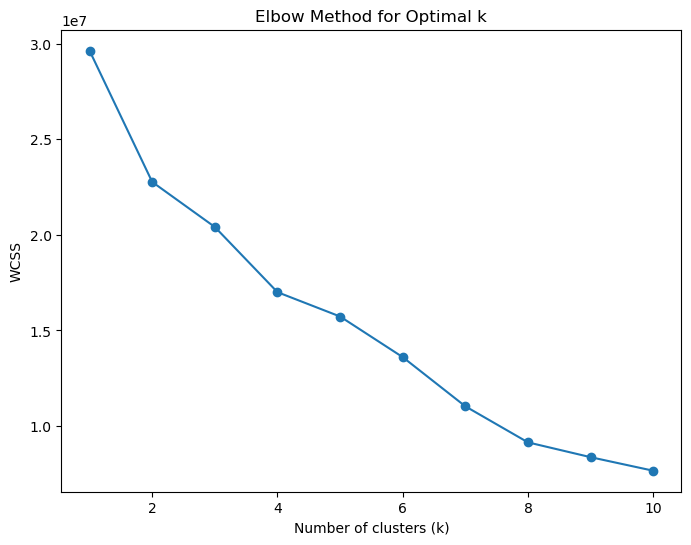

In [19]:
# Step 4: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

# Test k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Step 4: Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(scaled_features)
df_sample['Cluster'] = kmeans.labels_

# Step 5: Select only numerical columns for cluster summary
numeric_columns = ['event_duration', 'events_per_session', 'PageTime', 'TotalViewingTime', 
                   'TotalATCTime', 'TotalPurchaseTime', 'AmountOfItemsViewed', 
                   'AmountOfItemsPurchased', 'AmountOfItemsATC', 'Cluster']

# Calculate the mean values for each cluster using only numerical columns
cluster_summary = df_sample[numeric_columns].groupby('Cluster').mean()

# Display the cluster summary for the original data sample
print("Cluster Summary (Sample Data with Original Scale):")
print(cluster_summary)

Cluster Summary (Sample Data with Original Scale):
         event_duration  events_per_session      PageTime  TotalViewingTime  \
Cluster                                                                       
0           1145.241267           12.270193   3095.572320       3072.591461   
1            224.250027            9.649702   1205.176539       1161.548075   
2            291.287369           99.981600  16433.297773      16193.576747   
3             58.637779           54.315725   2865.090186          0.000000   
4            838.472321           15.443627   4137.218468          0.000000   
5            548.663799           29.025312   4688.406116          0.000000   
6            261.508417           41.913773   7090.685391       6877.243972   
7            136.356959           27.406349   1685.517162          0.000000   

         TotalATCTime  TotalPurchaseTime  AmountOfItemsViewed  \
Cluster                                                         
0            0.000000       

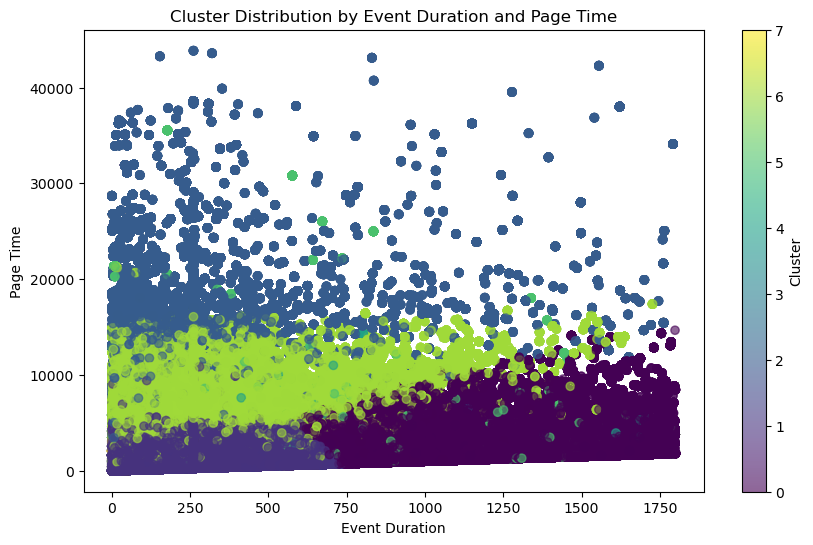

In [23]:
# Scatter plot of clusters based on two selected features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_sample['event_duration'], df_sample['PageTime'], 
                      c=df_sample['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Event Duration')
plt.ylabel('Page Time')
plt.title('Cluster Distribution by Event Duration and Page Time')
plt.show()

In [25]:
# Average values per cluster.
print("Cluster Summary (Average Values):")
print(cluster_summary)

Cluster Summary (Average Values):
         event_duration  events_per_session      PageTime  TotalViewingTime  \
Cluster                                                                       
0           1145.241267           12.270193   3095.572320       3072.591461   
1            224.250027            9.649702   1205.176539       1161.548075   
2            291.287369           99.981600  16433.297773      16193.576747   
3             58.637779           54.315725   2865.090186          0.000000   
4            838.472321           15.443627   4137.218468          0.000000   
5            548.663799           29.025312   4688.406116          0.000000   
6            261.508417           41.913773   7090.685391       6877.243972   
7            136.356959           27.406349   1685.517162          0.000000   

         TotalATCTime  TotalPurchaseTime  AmountOfItemsViewed  \
Cluster                                                         
0            0.000000           0.000000     

In [27]:
# Adding the text to the notebook in markdown format
from IPython.display import Markdown, display

cluster_description = """
#### Cluster Definitions and Customer Profiles

**Cluster 0 - Low Engagement Viewers**  
- **Distinct Features:** Medium-level `event_duration` and `PageTime`, low `AmountOfItemsViewed`, and nearly zero `TotalATCTime`.  
- **Interpretation:** These customers spend a certain amount of time on the site, but their interaction with products is low. They do not add products to their cart or proceed to purchase.

**Cluster 1 - Low Intensity Observers**  
- **Distinct Features:** Low `event_duration`, low `PageTime`, and low `TotalPurchaseTime`.  
- **Interpretation:** This group quickly browses the site and leaves. They do not show prolonged or in-depth engagement.

**Cluster 2 - High Viewers**  
- **Distinct Features:** Highest `PageTime` and `AmountOfItemsViewed`, but zero `TotalATCTime` and `TotalPurchaseTime`.  
- **Interpretation:** This group spends a long time viewing products and reviews many items, but they do not add items to the cart or proceed to purchase.

**Cluster 3 - Cart Adders**  
- **Distinct Features:** Very high `TotalATCTime` and `AmountOfItemsATC`.  
- **Interpretation:** These customers add many items to their cart but do not complete the purchase. They may intend to shop but hesitate in the decision-making stage.

**Cluster 4 - Quick Buyers**  
- **Distinct Features:** Very low `PageTime` and `event_duration`, but high `TotalPurchaseTime`.  
- **Interpretation:** This group quickly navigates the site and completes purchases swiftly. They may be target-oriented shoppers.

**Cluster 5 - High-Value Buyers**  
- **Distinct Features:** Very high `TotalPurchaseTime` and `AmountOfItemsPurchased`.  
- **Interpretation:** This group buys many items. They spend more time on the site and make substantial purchases, making them valuable customer profiles.

**Cluster 6 - Low Engagement Observers**  
- **Distinct Features:** Medium-level `PageTime`, low `AmountOfItemsViewed`.  
- **Interpretation:** This group browses the site but does not interact, add to the cart, or proceed to purchase.

**Cluster 7 - Quick Cart Adders**  
- **Distinct Features:** Low `event_duration` but high `AmountOfItemsATC`.  
- **Interpretation:** This group adds items to the cart quickly but does not proceed to purchase.
"""

display(Markdown(cluster_description))


#### Cluster Definitions and Customer Profiles

**Cluster 0 - Low Engagement Viewers**  
- **Distinct Features:** Medium-level `event_duration` and `PageTime`, low `AmountOfItemsViewed`, and nearly zero `TotalATCTime`.  
- **Interpretation:** These customers spend a certain amount of time on the site, but their interaction with products is low. They do not add products to their cart or proceed to purchase.

**Cluster 1 - Low Intensity Observers**  
- **Distinct Features:** Low `event_duration`, low `PageTime`, and low `TotalPurchaseTime`.  
- **Interpretation:** This group quickly browses the site and leaves. They do not show prolonged or in-depth engagement.

**Cluster 2 - High Viewers**  
- **Distinct Features:** Highest `PageTime` and `AmountOfItemsViewed`, but zero `TotalATCTime` and `TotalPurchaseTime`.  
- **Interpretation:** This group spends a long time viewing products and reviews many items, but they do not add items to the cart or proceed to purchase.

**Cluster 3 - Cart Adders**  
- **Distinct Features:** Very high `TotalATCTime` and `AmountOfItemsATC`.  
- **Interpretation:** These customers add many items to their cart but do not complete the purchase. They may intend to shop but hesitate in the decision-making stage.

**Cluster 4 - Quick Buyers**  
- **Distinct Features:** Very low `PageTime` and `event_duration`, but high `TotalPurchaseTime`.  
- **Interpretation:** This group quickly navigates the site and completes purchases swiftly. They may be target-oriented shoppers.

**Cluster 5 - High-Value Buyers**  
- **Distinct Features:** Very high `TotalPurchaseTime` and `AmountOfItemsPurchased`.  
- **Interpretation:** This group buys many items. They spend more time on the site and make substantial purchases, making them valuable customer profiles.

**Cluster 6 - Low Engagement Observers**  
- **Distinct Features:** Medium-level `PageTime`, low `AmountOfItemsViewed`.  
- **Interpretation:** This group browses the site but does not interact, add to the cart, or proceed to purchase.

**Cluster 7 - Quick Cart Adders**  
- **Distinct Features:** Low `event_duration` but high `AmountOfItemsATC`.  
- **Interpretation:** This group adds items to the cart quickly but does not proceed to purchase.


/var/folders/dz/6h0qw7sj6p7bwn7_zt0y8jz5qwt02z/T/ipykernel_67222/2469028308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
/var/folders/dz/6h0qw7sj6p7bwn7_zt0y8jz5qwt02z/T/ipykernel_67222/2469028308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
/var/folders/dz/6h0qw7sj6p7bwn7_zt0y8jz5qwt02z/T/ipykernel_67222/2469028308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index

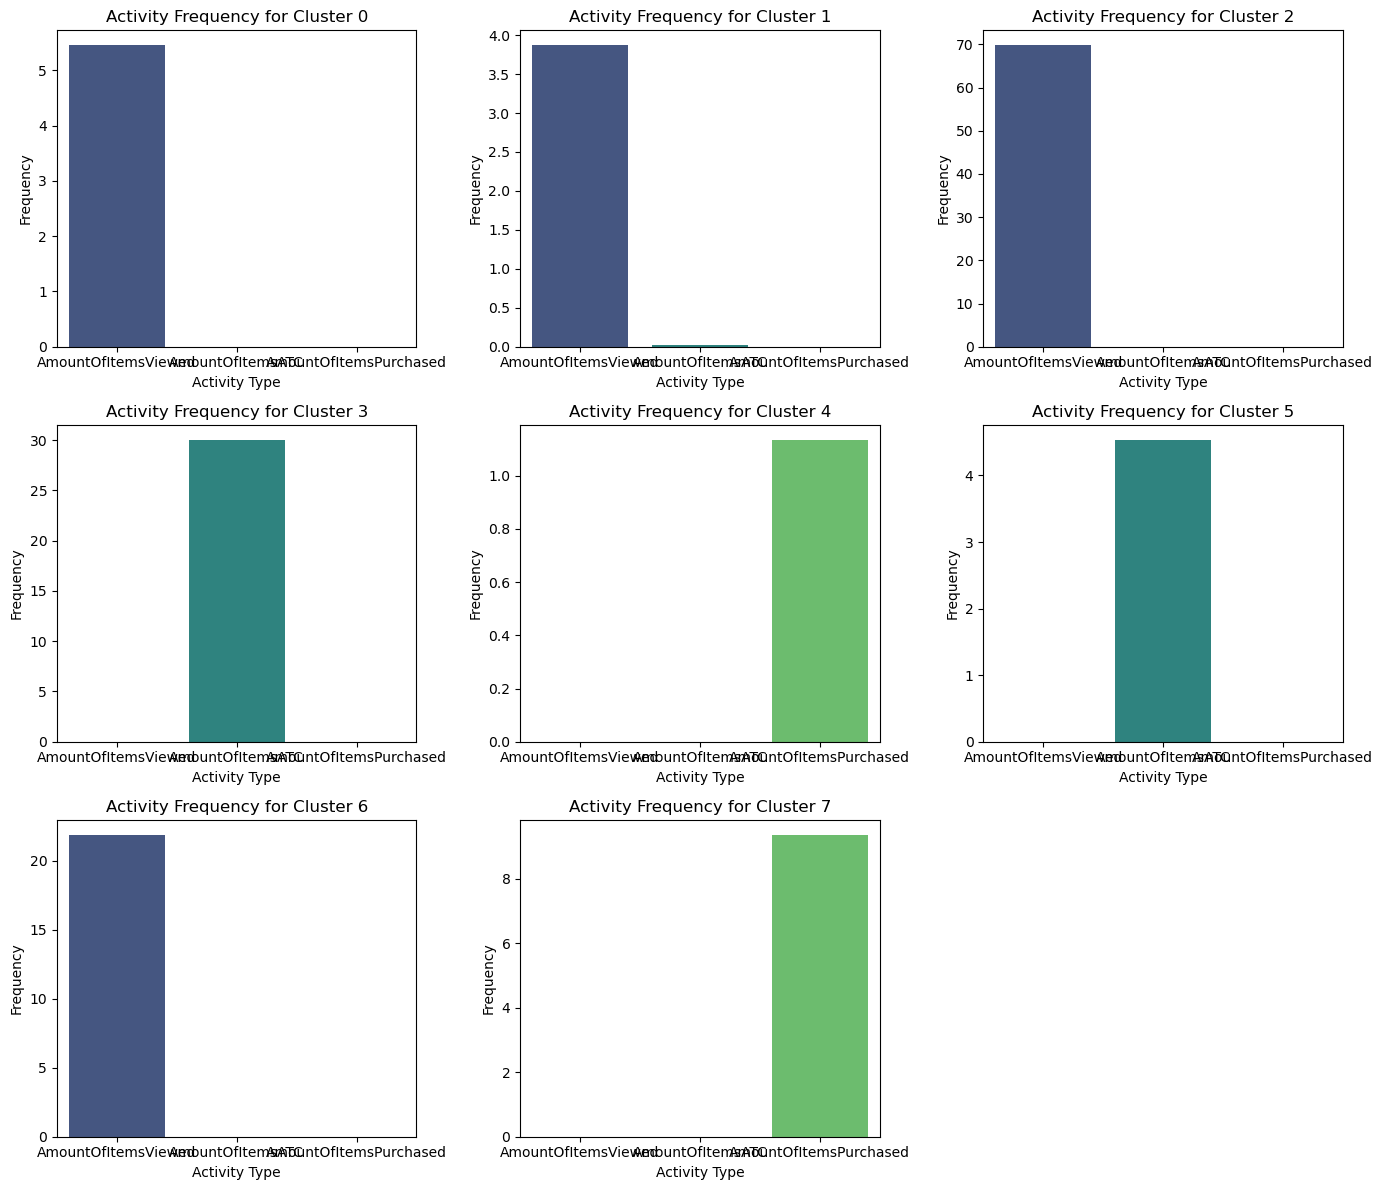

In [29]:
# Loop through each cluster and plot the activity frequencies
plt.figure(figsize=(14, 12))

for cluster_id in df_sample['Cluster'].unique():
    cluster_data = df_sample[df_sample['Cluster'] == cluster_id]
    activity_counts = cluster_data[['AmountOfItemsViewed', 'AmountOfItemsATC', 'AmountOfItemsPurchased']].mean()
    
    plt.subplot(3, 3, cluster_id + 1)  # Adjust layout to fit all clusters in a grid
    sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
    plt.title(f"Activity Frequency for Cluster {cluster_id}")
    plt.ylabel("Frequency")
    plt.xlabel("Activity Type")

plt.tight_layout()
plt.show()

In [31]:
text = """
**Cluster Analysis:**

- **Cluster 0, 1, 6, and 2:** These clusters primarily view products but do not engage in adding to the cart or purchasing activities. Especially in Cluster 2, the viewing frequency is very high, indicating that this group actively examines products on the site without taking further action.

- **Cluster 3:** Users in this cluster are heavily engaged in adding items to their cart but have very low or no purchasing activity. This suggests that these users reach the final stage of the purchasing process but hesitate to complete the transaction.

- **Cluster 4:** Users in this cluster tend to make purchases quickly, with low levels of cart additions and product views. This group might be focused on a targeted shopping experience.

- **Cluster 5 and 7:** Cluster 5 has a high purchasing frequency, indicating that these users could be considered a valuable customer segment. Cluster 7 shows a high frequency of cart additions but no purchases.
"""

display(Markdown(text))


**Cluster Analysis:**

- **Cluster 0, 1, 6, and 2:** These clusters primarily view products but do not engage in adding to the cart or purchasing activities. Especially in Cluster 2, the viewing frequency is very high, indicating that this group actively examines products on the site without taking further action.

- **Cluster 3:** Users in this cluster are heavily engaged in adding items to their cart but have very low or no purchasing activity. This suggests that these users reach the final stage of the purchasing process but hesitate to complete the transaction.

- **Cluster 4:** Users in this cluster tend to make purchases quickly, with low levels of cart additions and product views. This group might be focused on a targeted shopping experience.

- **Cluster 5 and 7:** Cluster 5 has a high purchasing frequency, indicating that these users could be considered a valuable customer segment. Cluster 7 shows a high frequency of cart additions but no purchases.


Correlation Matrix:
                        AmountOfItemsViewed  AmountOfItemsATC  \
AmountOfItemsViewed                1.000000         -0.038496   
AmountOfItemsATC                  -0.038496          1.000000   
AmountOfItemsPurchased            -0.018208         -0.001939   

                        AmountOfItemsPurchased  
AmountOfItemsViewed                  -0.018208  
AmountOfItemsATC                     -0.001939  
AmountOfItemsPurchased                1.000000  


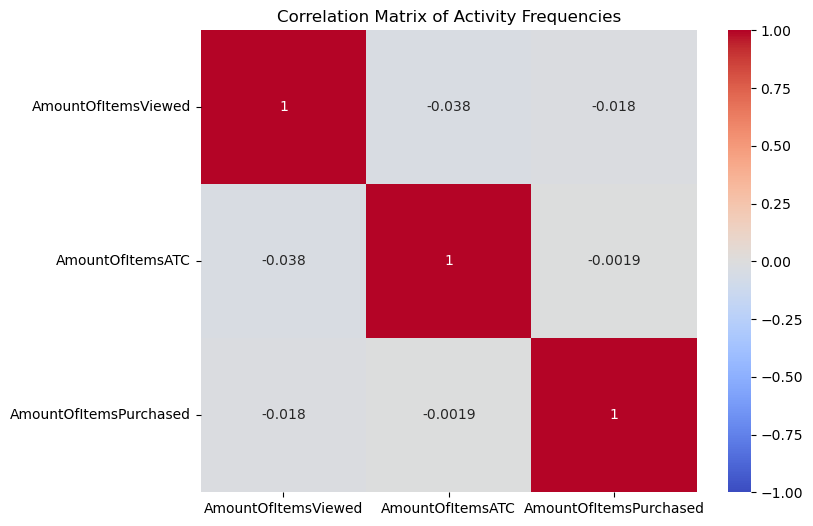

In [33]:
# Select the columns to include in the correlation analysis
correlation_columns = ['AmountOfItemsViewed', 'AmountOfItemsATC', 'AmountOfItemsPurchased']

# Calculate correlation matrix
correlation_matrix = df_sample[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Activity Frequencies")
plt.show()

# There is no a significant output...

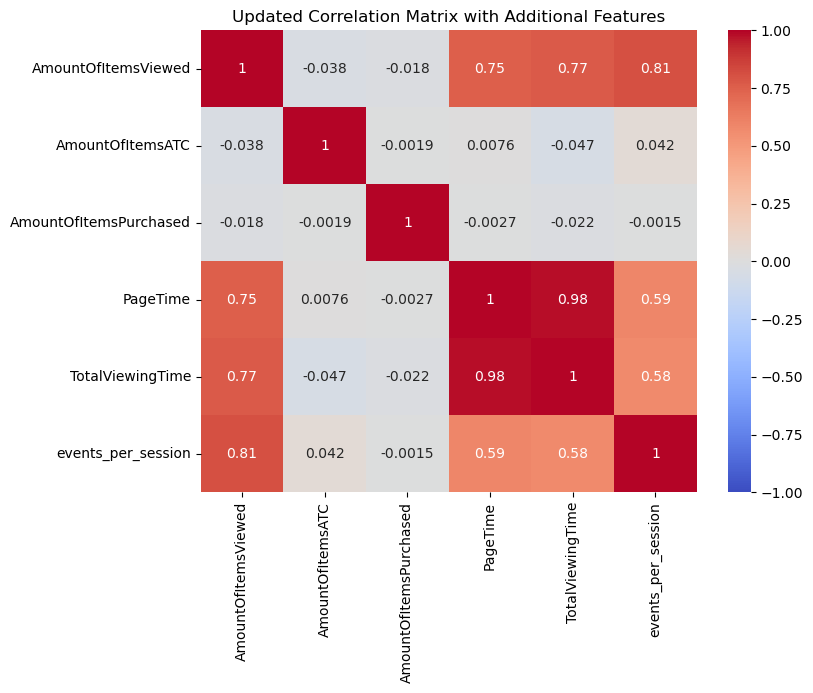

In [35]:
selected_features = ['AmountOfItemsViewed', 'AmountOfItemsATC', 'AmountOfItemsPurchased', 'PageTime', 'TotalViewingTime', 'events_per_session']

correlation_matrix = df_sample[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Updated Correlation Matrix with Additional Features")
plt.show()

# There is no a significant output...

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_sample[['AmountOfItemsViewed', 'AmountOfItemsATC', 'PageTime', 'TotalViewingTime', 'events_per_session']]
y = df_sample['AmountOfItemsPurchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the Model:")
print(coefficients)

# There is no a significant output...

Mean Squared Error (MSE): 0.013263899906787086
R-squared (R2): 0.011760067125684892

Coefficients of the Model:
                     Coefficient
AmountOfItemsViewed    -0.000047
AmountOfItemsATC       -0.004881
PageTime                0.000017
TotalViewingTime       -0.000018
events_per_session      0.000020


In [39]:
# Selecting relevant columns, including 'event_duration' and other features that might be related
selected_features = ['event_duration', 'PageTime', 'TotalViewingTime', 'events_per_session']

# Checking for missing values
missing_values = df_sample[selected_features].isnull().sum()
print("Missing Values in Selected Features:\n", missing_values)

# Dropping rows with missing values in the selected columns
df_cleaned = df_sample[selected_features].dropna()
print(f"Cleaned Data Shape: {df_cleaned.shape}")

Missing Values in Selected Features:
 event_duration        0
PageTime              0
TotalViewingTime      0
events_per_session    0
dtype: int64
Cleaned Data Shape: (3292496, 4)


Correlation Matrix:
                     event_duration  PageTime  TotalViewingTime  \
event_duration            1.000000  0.091016          0.095222   
PageTime                  0.091016  1.000000          0.982965   
TotalViewingTime          0.095222  0.982965          1.000000   
events_per_session       -0.111147  0.586099          0.575058   

                    events_per_session  
event_duration               -0.111147  
PageTime                      0.586099  
TotalViewingTime              0.575058  
events_per_session            1.000000  


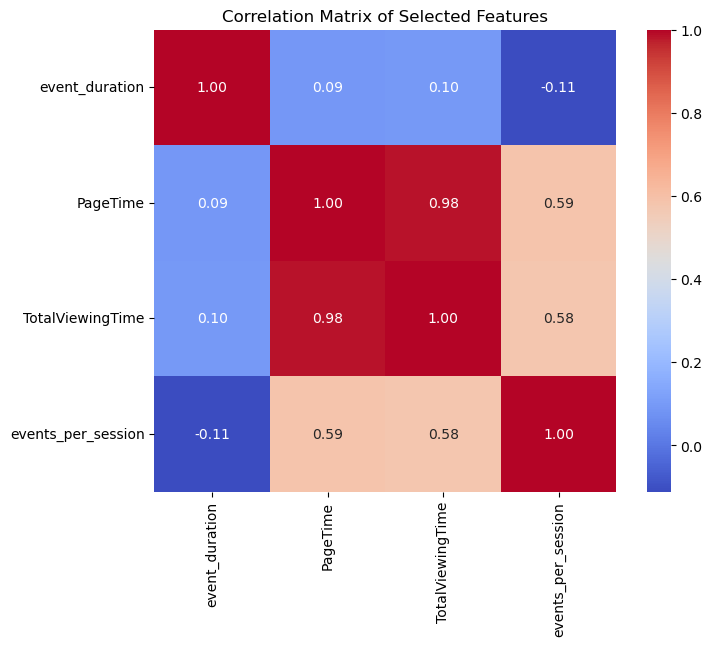

In [41]:
# Calculating the correlation matrix
correlation_matrix = df_cleaned[selected_features].corr()

# Displaying the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Features")
plt.show()

# # There is no a significant output...

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define the features (independent variables) and target variable
X = df_sample[['event_duration', 'PageTime', 'TotalViewingTime', 'events_per_session']]
y = df_sample['AmountOfItemsPurchased']  # Target variable (e.g., purchase frequency)

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 3: Initialize the regression model
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the Model:")
print(coefficients)

# There is no a significant output...

Mean Squared Error (MSE): 0.013414147018032665
R-squared (R2): 0.01244030732604906

Coefficients of the Model:
                     Coefficient
event_duration      8.882943e-07
PageTime            1.501300e-05
TotalViewingTime   -1.570469e-05
events_per_session -1.356066e-06


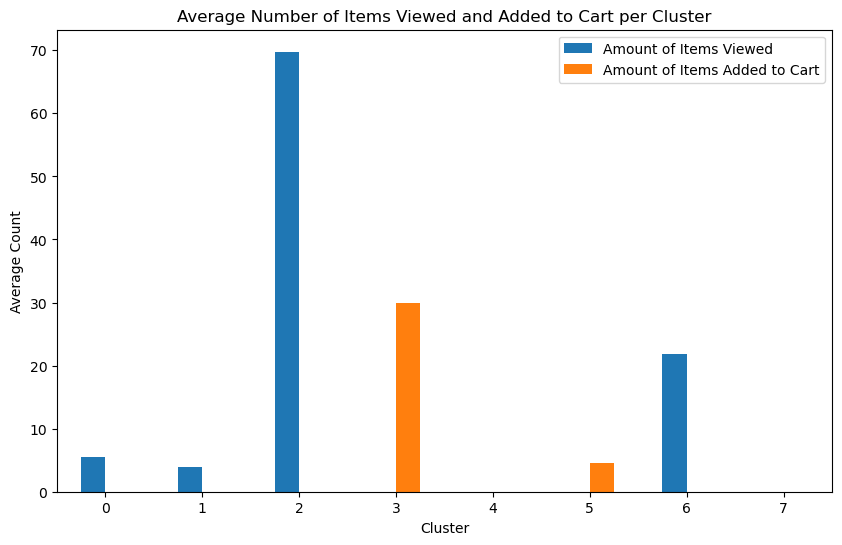

In [45]:
# Calculate average values for AmountOfItemsViewed and AmountOfItemsATC for each cluster
viewed_vs_atc = df_sample.groupby('Cluster')[['AmountOfItemsViewed', 'AmountOfItemsATC']].mean()

# Plot the bar chart
viewed_vs_atc.plot(kind='bar', figsize=(10, 6))
plt.title("Average Number of Items Viewed and Added to Cart per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.legend(["Amount of Items Viewed", "Amount of Items Added to Cart"])
plt.show()

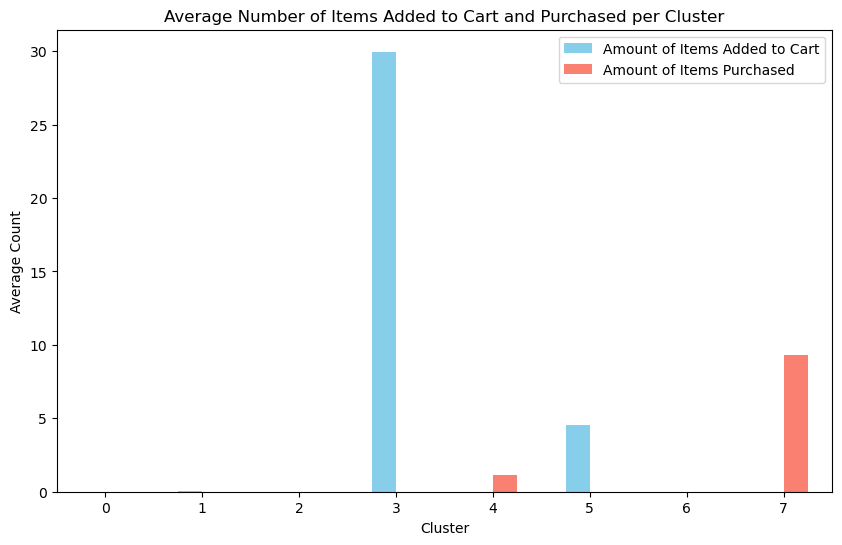

In [47]:
# Calculate average values for AmountOfItemsATC and AmountOfItemsPurchased for each cluster
atc_vs_purchase = df_sample.groupby('Cluster')[['AmountOfItemsATC', 'AmountOfItemsPurchased']].mean()

# Plot the bar chart
atc_vs_purchase.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Average Number of Items Added to Cart and Purchased per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.legend(["Amount of Items Added to Cart", "Amount of Items Purchased"])
plt.show()

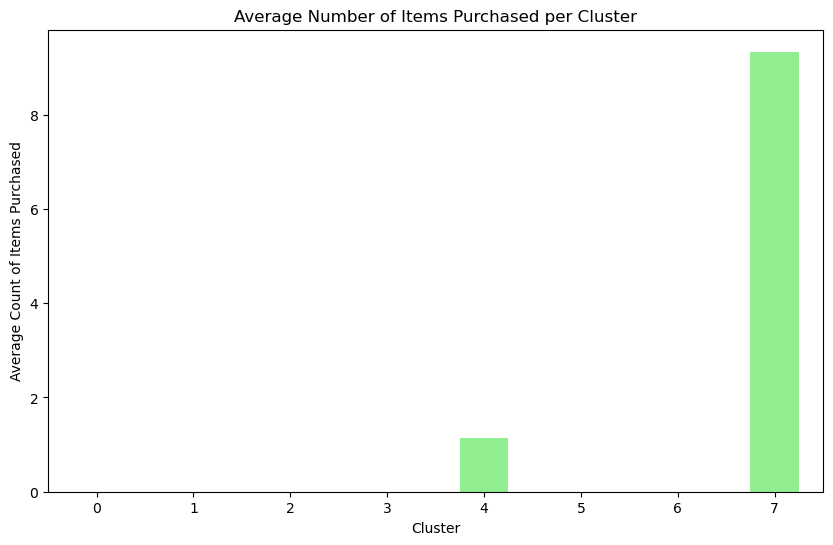

In [49]:
# Calculate average purchase count for each cluster
average_purchase_per_cluster = df_sample.groupby('Cluster')['AmountOfItemsPurchased'].mean()

# Plot the bar chart
average_purchase_per_cluster.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title("Average Number of Items Purchased per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Count of Items Purchased")
plt.xticks(rotation=0)
plt.show()

In [122]:
# Adding text explanation to the notebook

from IPython.display import display, Markdown

text = """
**Cluster Analysis on Item Viewing, Cart Addition, and Purchase Frequency**

The analysis focused on understanding the behavior of different customer clusters with respect to three key activities: viewing items, adding items to the cart, and purchasing items. Based on the visualizations:

1. **Cluster 2**: This cluster exhibits a high frequency of item views, indicating that users in this segment are actively exploring products. However, the low rates of cart addition and absence of purchases suggest a potential barrier to conversion. Efforts could be directed towards understanding why these users hesitate to proceed beyond viewing.

2. **Cluster 3**: Users in this cluster add items to their cart frequently but do not complete purchases. This behavior suggests that these users may be interested in specific products but face hurdles before purchasing. Implementing reminders or incentives, such as discounts for items left in the cart, could encourage conversion.

3. **Cluster 5**: Although not as prominent as others, Cluster 5 shows moderate cart addition and purchase rates. Users in this segment are valuable due to their relatively higher purchase frequency. Enhancing their experience through personalized recommendations or loyalty rewards may increase their purchase behavior.

4. **Cluster 7**: This cluster is notable for its high purchase rate, making it the most valuable customer group. These users may respond positively to exclusive offers, early access to new products, or targeted promotions to retain their loyalty and increase purchase frequency.

These observations can guide targeted strategies to optimize the user journey for each cluster, particularly focusing on improving the conversion rates for clusters with high viewing or cart activity but low purchase frequency.
"""

display(Markdown(text))


**Cluster Analysis on Item Viewing, Cart Addition, and Purchase Frequency**

The analysis focused on understanding the behavior of different customer clusters with respect to three key activities: viewing items, adding items to the cart, and purchasing items. Based on the visualizations:

1. **Cluster 2**: This cluster exhibits a high frequency of item views, indicating that users in this segment are actively exploring products. However, the low rates of cart addition and absence of purchases suggest a potential barrier to conversion. Efforts could be directed towards understanding why these users hesitate to proceed beyond viewing.

2. **Cluster 3**: Users in this cluster add items to their cart frequently but do not complete purchases. This behavior suggests that these users may be interested in specific products but face hurdles before purchasing. Implementing reminders or incentives, such as discounts for items left in the cart, could encourage conversion.

3. **Cluster 5**: Although not as prominent as others, Cluster 5 shows moderate cart addition and purchase rates. Users in this segment are valuable due to their relatively higher purchase frequency. Enhancing their experience through personalized recommendations or loyalty rewards may increase their purchase behavior.

4. **Cluster 7**: This cluster is notable for its high purchase rate, making it the most valuable customer group. These users may respond positively to exclusive offers, early access to new products, or targeted promotions to retain their loyalty and increase purchase frequency.

These observations can guide targeted strategies to optimize the user journey for each cluster, particularly focusing on improving the conversion rates for clusters with high viewing or cart activity but low purchase frequency.
